In [22]:
import numpy as np
import pandas as pd
import matplotlib
import warnings
warnings.filterwarnings('ignore') 


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, auc, roc_curve, classification_report
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [26]:
df = pd.read_csv("data.csv", encoding='latin',na_values=["No Info"])
df.shape

(472, 116)

In [27]:
df.head(3)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,NaN,NaN,-1.0,Video distributi

In [28]:
df.columns.to_list()

['Company_Name',
 'Dependent-Company Status',
 'year of founding',
 'Age of company in years',
 'Internet Activity Score',
 'Short Description of company profile',
 'Industry of company',
 'Focus functions of company',
 'Investors',
 'Employee Count',
 'Employees count MoM change',
 'Has the team size grown',
 'Est. Founding Date',
 'Last Funding Date',
 'Last Funding Amount',
 'Country of company',
 'Continent of company',
 'Number of Investors in Seed',
 'Number of Investors in Angel and or VC',
 'Number of Co-founders',
 'Number of of advisors',
 'Team size Senior leadership',
 'Team size all employees',
 'Presence of a top angel or venture fund in previous round of investment',
 'Number of of repeat investors',
 'Number of  Sales Support material',
 'Worked in top companies',
 'Average size of companies worked for in the past',
 'Have been part of startups in the past?',
 'Have been part of successful startups in the past?',
 'Was he or she partner in Big 5 consulting?',
 'Consulti

In [29]:
#Renaming long column names to short
df.rename(columns={'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive'
                   :"Capital intensive business", 
                    "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?"
                  :"Talking about company/model",
                   'Survival through recession, based on existence of the company through recession times'
                   :"Survival through recession",
                  "Online or offline venture - physical location based business or online venture?"
                   :"Online or offline venture",
                  "Avg time to investment - average across all rounds, measured from previous investment"
                   :"Avg time to investment"},inplace=True)


In [30]:
df.sample(5)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,Capital intensive business,Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture,B2C or B2B venture?,Talking about company/model,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Survival through recession,Time to 1st investment (in months),Avg time to investment,Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
156,Company157,Success,2007.0,7.0,-69.0,Relational Database Managment System,Analytics,Strategy,Bay Partners|Mohr Davidow Ventures|PacVen Wald...,55.0,4.0,Yes,1/1/2007,4/25/2012,20000000.0,United States,North America,0.0,7.0,2,0,6,46.0,Yes,6.0,high,No,Medium,Yes,Yes,No,No,Product,Yes,Private,No,Structured,No,Both,Global,Linear,Yes,NaN,No,No,No,No,No,No,Yes,Yes,No,No,Online,B2B,High,High,No,Medium,Masters,21.0,MBA,Yes,N

In [31]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 116 columns):
 #    Column                                                                   Dtype  
---   ------                                                                   -----  
 0    Company_Name                                                             object 
 1    Dependent-Company Status                                                 object 
 2    year of founding                                                         float64
 3    Age of company in years                                                  float64
 4    Internet Activity Score                                                  float64
 5    Short Description of company profile                                     object 
 6    Industry of company                                                      object 
 7    Focus functions of company                                               object 
 8    Investors         

In [32]:
#converting  "Est. Founding Date" and "Last Funding Date" to datetime
df["Est. Founding Date"]=pd.to_datetime(df["Est. Founding Date"])
df["Last Funding Date"]=pd.to_datetime(df["Last Funding Date"])

#converting "Last round of funding received (in milionUSD)" to numeric
df["Last round of funding received (in milionUSD)"]=pd.to_numeric(df["Last round of funding received (in milionUSD)"], errors='coerce')

In [33]:
#checking unique values
uniqs = []
for column in df.columns:
    un = df[column].unique()
    nu = len(un)
    uniqs.append([column,nu,un[:min(nu,10)]])
    
pd.DataFrame(uniqs,columns=["column","nunique","values"])


,column,nunique,values
0,Company_Name,472,"[Company1, Company2, Company3, Company4, Compa..."
1,Dependent-Company Status,2,"[Success, Failed]"
2,year of founding,16,"[nan, 2011.0, 2009.0, 2010.0, 2013.0, 2008.0, ..."
3,Age of company in years,16,"[nan, 3.0, 5.0, 4.0, 1.0, 6.0, 12.0, 9.0, 2.0,..."
4,Internet Activity Score,261,"[-1.0, 125.0, 455.0, -99.0, 496.0, 106.0, 39.0..."
5,Short Description of company profile,314,"[Video distribution, nan, Event Data Analytics..."
6,Industry of company,193,"[nan, Market Research|Marketing|Crowdfunding, ..."
7,Focus functions of company,165,"[operation, Marketing, sales, operations, Mark..."
8,Investors,320,[KPCB Holdings|Draper Fisher Jurvetson (DFJ)|K...
9,Employee Count,85,"[3.0, nan, 14.0, 45.0, 39.0, 7.0, 29.0, 16.0, ..."


### Given columns contain multiple values which have same meaning   
- ***Has the team size grown***                 [No, Yes, yes, nan, YES]  
- ***Cloud or platform based serive/product?*** [Platform, cloud, Cloud, nan, Both]   
- ***Local or global player***	[Global, Local, local, global, GLOBAL, LOCAL, nan, GLObaL, local]   

In [34]:
#replacing this values
df["Has the team size grown"] = df["Has the team size grown"].replace({"yes":"Yes","YES":"Yes"})

df["Cloud or platform based serive/product?"] = df["Cloud or platform based serive/product?"].replace({"cloud":"Cloud"})

df["Local or global player"] = df["Local or global player"].replace({"local  ":"Local","local":"Local","LOCAL":"Local",
                                                                     "global":"Global","GLObaL":"Global","GLOBAL":"Global"})

In [35]:
#checking for null values in the dataset
info = pd.DataFrame([df.isnull().sum(),
                     df.isnull().sum()/df.shape[0]*100], 
                     index = ["Null Values","% Missing Values"]).T.sort_values(by='Null Values',ascending=False)

info

,Null Values,% Missing Values
Number of of Partners of company,385.0,81.567797
Employee benefits and salary structures,351.0,74.364407
Number of of Research publications,334.0,70.762712
Top management similarity,282.0,59.745763
Client Reputation,274.0,58.050847
Degree from a Tier 1 or Tier 2 university?,232.0,49.152542
Employees count MoM change,205.0,43.432203
Time to maturity of technology (in years),172.0,36.440678
Gartner hype cycle stage,172.0,36.440678
Last round of funding received (in milionUSD),167.0,35.381356


In [36]:
df.describe(include=['float','int']).T.style.background_gradient(cmap='viridis') 

,count,mean,std,min,25%,50%,75%,max
year of founding,413.000000,2009.394673,2.607247,1997.000000,2008.000000,2010.000000,2011.000000,2013.000000
Age of company in years,413.000000,4.605327,2.607247,1.000000,3.000000,4.000000,6.000000,17.000000
Internet Activity Score,407.000000,114.159705,225.651419,-725.000000,-3.500000,60.000000,216.000000,1535.000000
Employee Count,306.000000,31.408497,62.673600,0.000000,4.250000,13.000000,31.000000,594.000000
Employees count MoM change,267.000000,-1.299625,23.967085,-100.000000,0.000000,0.000000,6.000000,50.000000
Last Funding Amount,312.000000,6379489.435897,9901621.781409,10000.000000,750000.000000,2800000.000000,7850000.000000,77000000.000000
Number of Investors in Seed,423.000000,1.546099,2.959782,0.000000,0.000000,0.000000,2.000000,24.000000
Number of Investors in Angel and or VC,423.000000,0.576832,1.396723,0.000000,0.000000,0.000000,0.000000,9.000000
Number of Co-founders,472.000000,1.868644,1.143481,0.000000,1.000000,2.000000,2.250000,7.000000
Number of of advisors,472.000000,1.016949,2.014736,0.000000,0.000000,0.000000,1.000000,13.000000


In [37]:
df.describe(include='O')

,Company_Name,Dependent-Company Status,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Country of company,Continent of company,Presence of a top angel or venture fund in previous round of investment,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,Capital intensive business,Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture,B2C or B2B venture?,Talking about company/model,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Experience in selling and building products,Top management similarity,Number of of Research publications,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Disruptiveness of technology,Survival through recession,Gartner hype cycle stage,Time to maturity of technology (in years)
count,472,472,323,348,442,332,421,401,401,375,424,453,441,452,452,452,450,462,461,463,463,463,459,460,448,454,446,87,467,467,466,467,467,437,467,467,463,442,466,469,349,392,387,387,369,371,377,385,240,356,190,138,388,386,388,390,389,121,383,386,472,387,390,387,198,389,387,336,390,374,300,300
unique,472,2,313,192,164,319,2,22,4,2,5,2,3,2,2,2,2,3,2,4,2,5,2,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3,3,2,3,3,148,2,2,3,3,3,2,3,3,2,2,3,4,2,2,2,2,2,2,3,2,2,2,3,3,5,4
top,Company472,Success,Big Data Analytics,Analytics,Operations,TechStars,No,United States,North America,No,low,No,Small,Yes,Yes,No,No,Service,No,Private,No,Structured,Yes,Platform,Global,Non-Linear,No,Few,No,No,No,No,No,No,No,No,No,No,Online,B2B,Low,High,Yes,Low,Bachelors,business,Yes,Yes,Tier_1,Medium,Medium,Many,Low,Low,No,No,Low,Bad,No,No,Yes,No,No,No,Low,No,Yes,No,Medium,Not Applicable,Plateau,2 to 5
freq,1,305,4,53,31,7,266,305,308,282,150,380,228,298,258,428,245,231,231,162,281,166,267,296,237,320,328,73,437,445,337,316,436,321,251,395,411,335,410,307,243,271,246,178,169,22,281,301,139,147,88,81,185,178,198,330,253,42,277,294,252,311,380,329,119,216,218,285,189,268,85,180


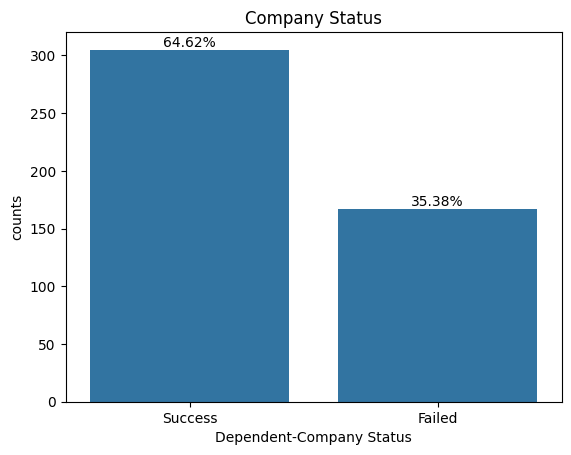

In [38]:
counts = df["Dependent-Company Status"].value_counts()

ax = sns.barplot(data=counts)
ax.set_title("Company Status")
plt.ylabel("counts")

for i in range(counts.shape[0]):
    count = counts.iloc[i]
    percent = (count / df["Dependent-Company Status"].shape[0]) * 100
    ax.text(i, count , f"{percent:.2f}%", va='bottom', ha='center')

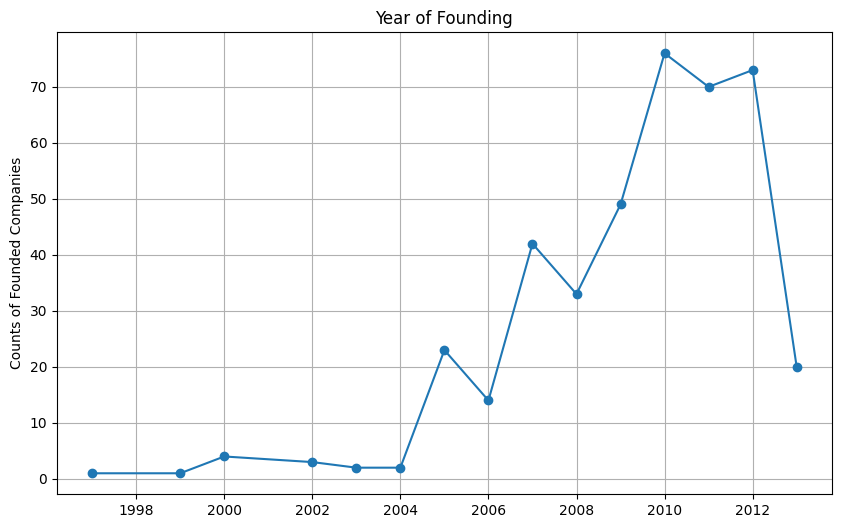

In [39]:
founding_years_counts = df['year of founding'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(founding_years_counts, marker='o', linestyle='-')

plt.title('Year of Founding')
plt.ylabel('Counts of Founded Companies')

plt.grid(True)

plt.show()

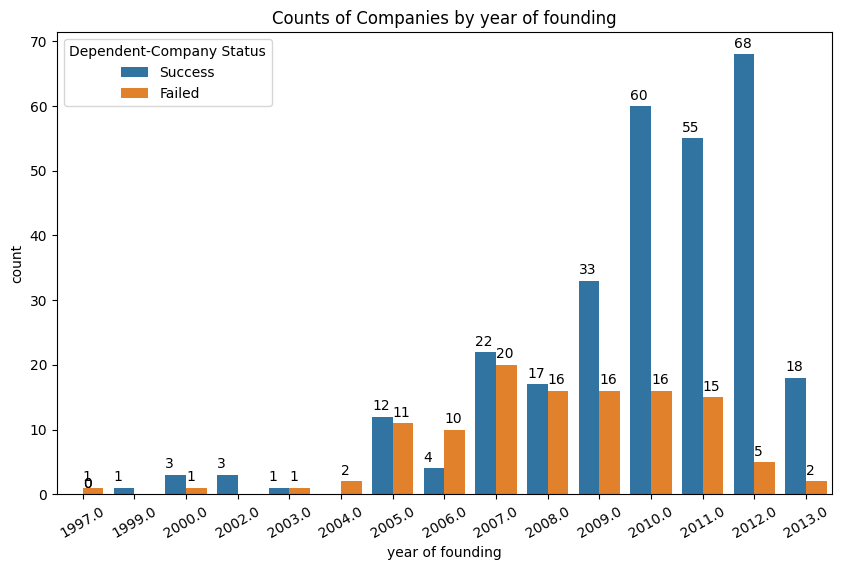

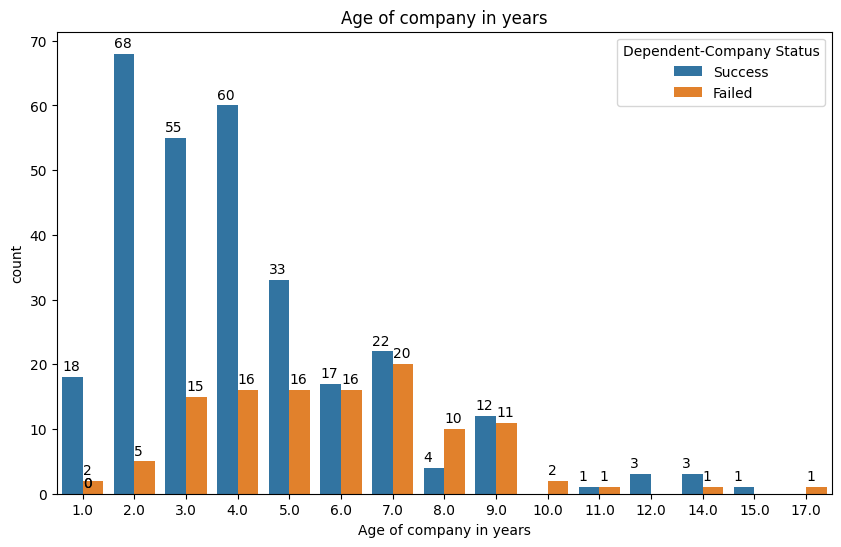

In [40]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="year of founding", hue="Dependent-Company Status",hue_order=['Success','Failed'])
plt.title("Counts of Companies by year of founding")
plt.ylabel("count")
plt.xticks(rotation=30)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, f"{int(i.get_height())}", )
    
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="Age of company in years", hue="Dependent-Company Status")
plt.title("Age of company in years")
plt.ylabel("count")
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1, f"{int(i.get_height())}")
plt.show()

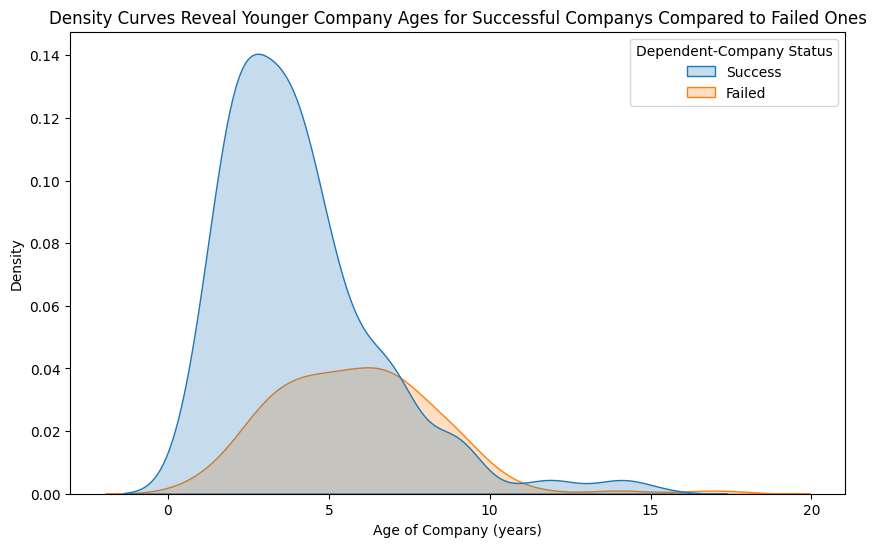

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df,x='Age of company in years', hue='Dependent-Company Status', fill=True)
plt.title("Density Curves Reveal Younger Company Ages for Successful Companys Compared to Failed Ones")
plt.xlabel("Age of Company (years)")
plt.ylabel("Density")

plt.show()

- The peak period for startup founding was between 2009 and 2012
- High success rates observed in 2010, 2011, and 2012.
- Failure rate were highest in 2006     
- Startups founded within the last 5 years tend to be more successful, indicating that recent companies have a higher chance of success than older ones. In addition, while success tends to peak in the first 2-4 years of a startup's life, failure is more evenly distributed across the life of a company, suggesting ongoing challenges for companies at all stages of development.

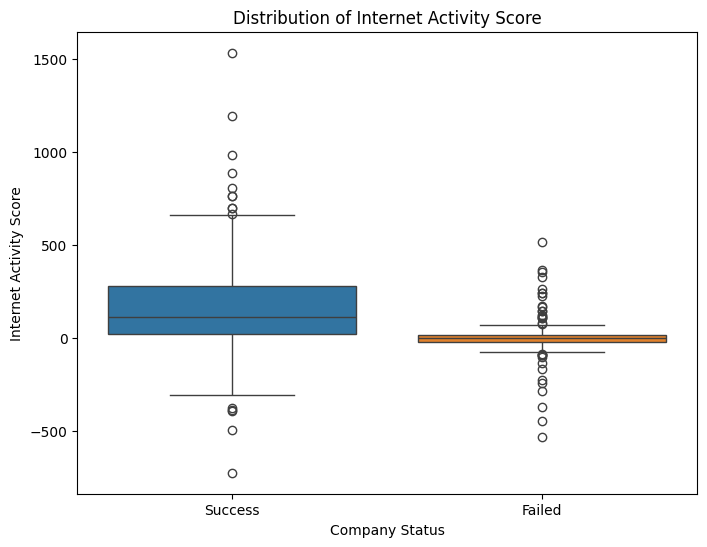

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(df,hue='Dependent-Company Status', x='Dependent-Company Status', y='Internet Activity Score')
plt.title('Distribution of Internet Activity Score')
plt.xlabel('Company Status')
plt.ylabel('Internet Activity Score')
plt.show()

- Successful companies have significantly higher Internet Activity Scores than failed companies.
- The companies which didnt succeed have very low internet activity score 

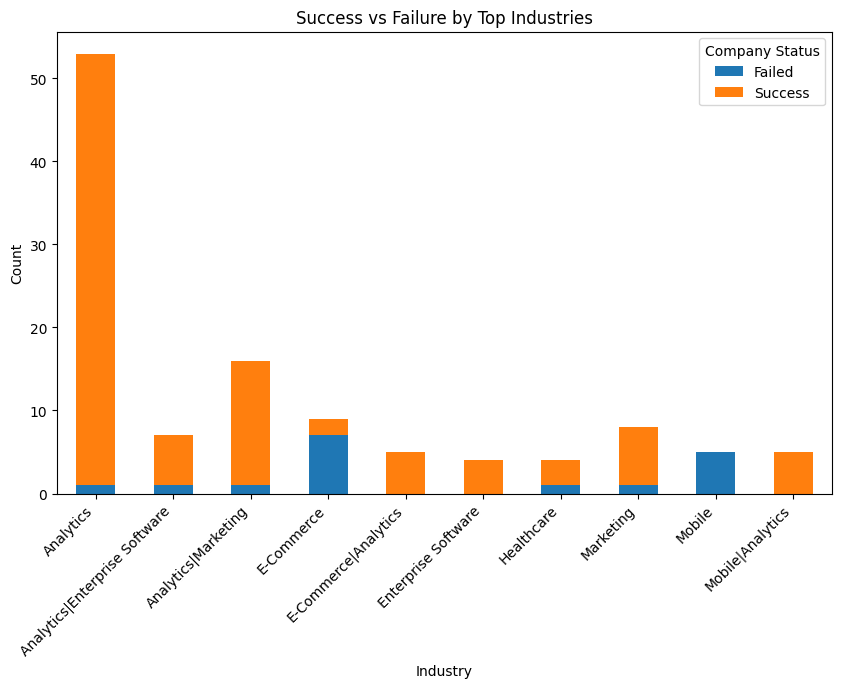

In [43]:
top_industries = df['Industry of company'].value_counts().nlargest(10).index
df_filtered = df[df['Industry of company'].isin(top_industries)]
industry_success_count_filtered = df_filtered.groupby(['Industry of company', 'Dependent-Company Status']).size().unstack()

industry_success_count_filtered.plot.bar(stacked=True, figsize=(10, 6))
plt.title('Success vs Failure by Top Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Status')
plt.show()

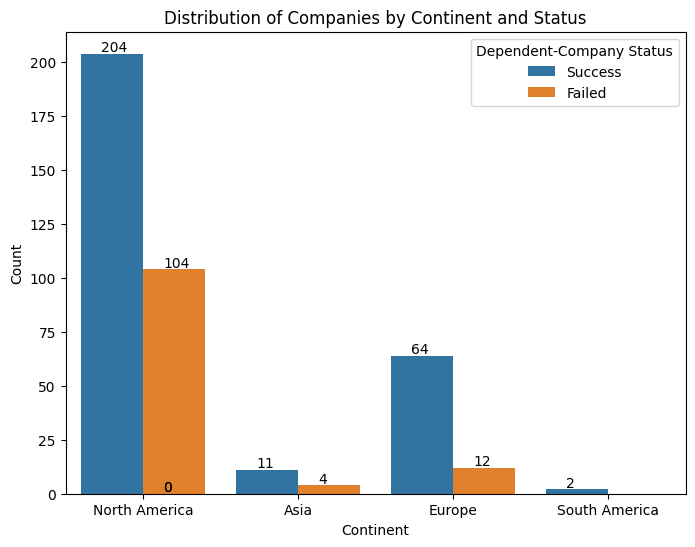

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df, x="Continent of company", hue="Dependent-Company Status")
plt.title("Distribution of Companies by Continent and Status")
plt.xlabel("Continent")
plt.ylabel("Count")

for i in ax.patches:
    ax.text(i.get_x()+0.13,i.get_height()+1,int(i.get_height()))
plt.show()                                       

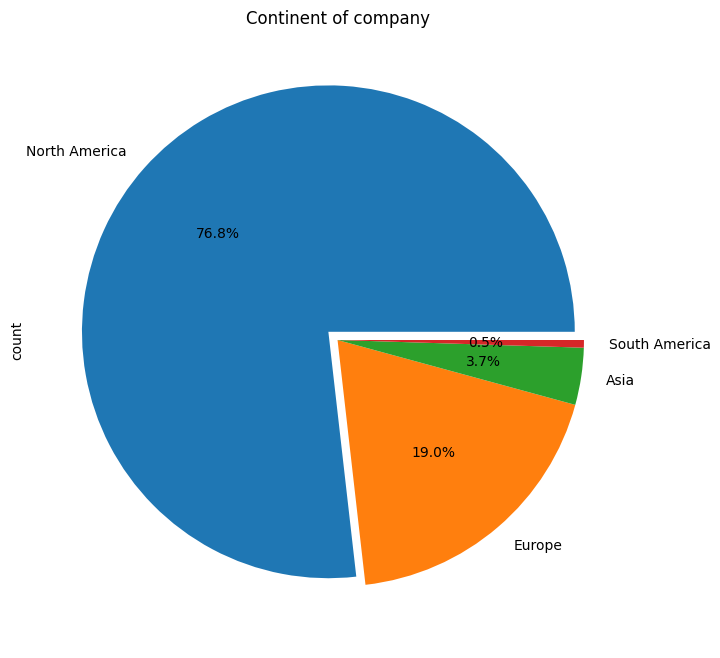

In [45]:
explode=[0.05,0.,0.,0.]
df["Continent of company"].value_counts().astype(int).plot.pie(autopct="%.1f%%",explode=explode,figsize=(8, 8),title='Continent of company')
plt.show()       

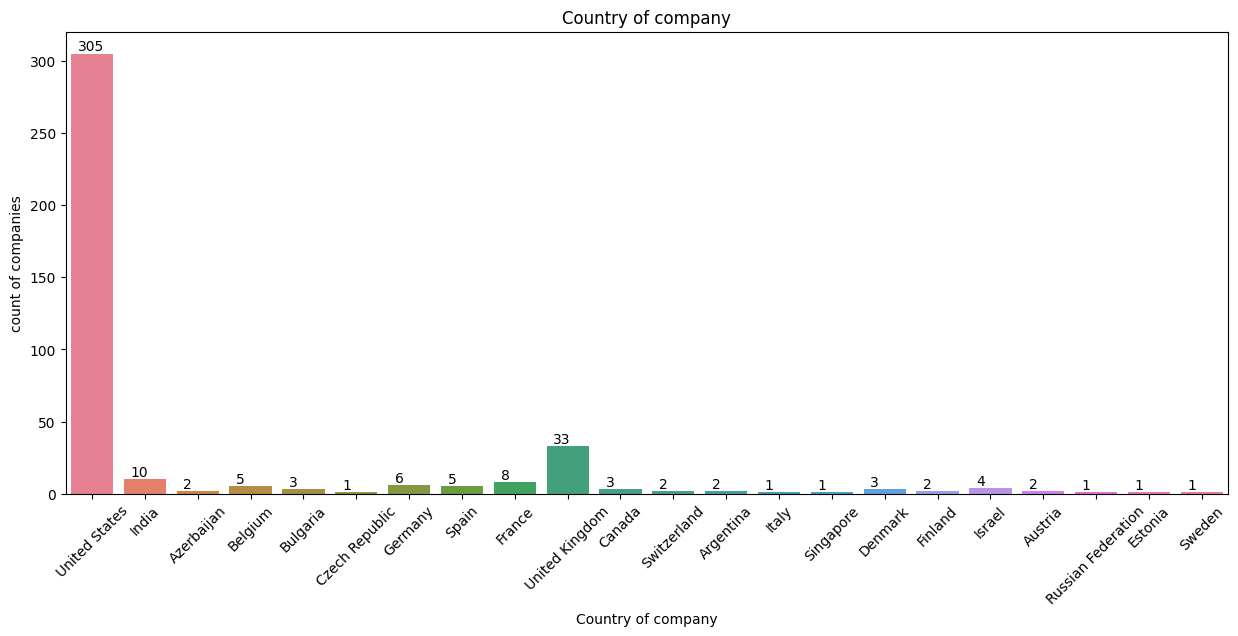

In [46]:
plt.figure(figsize=(15,6))
ax=sns.countplot(df,x="Country of company", hue="Country of company", legend=0)
plt.title("Country of company")
plt.ylabel("count of companies")
plt.xticks(rotation=45)

for i in ax.patches:
    ax.text(i.get_x()+0.13, i.get_height()+2, int(i.get_height()))


- The dataset contains most companies from the United States, followed by the United Kingdom and India. 
- Although there is a 100% success rate for countries like South America, it has only 2 startups.

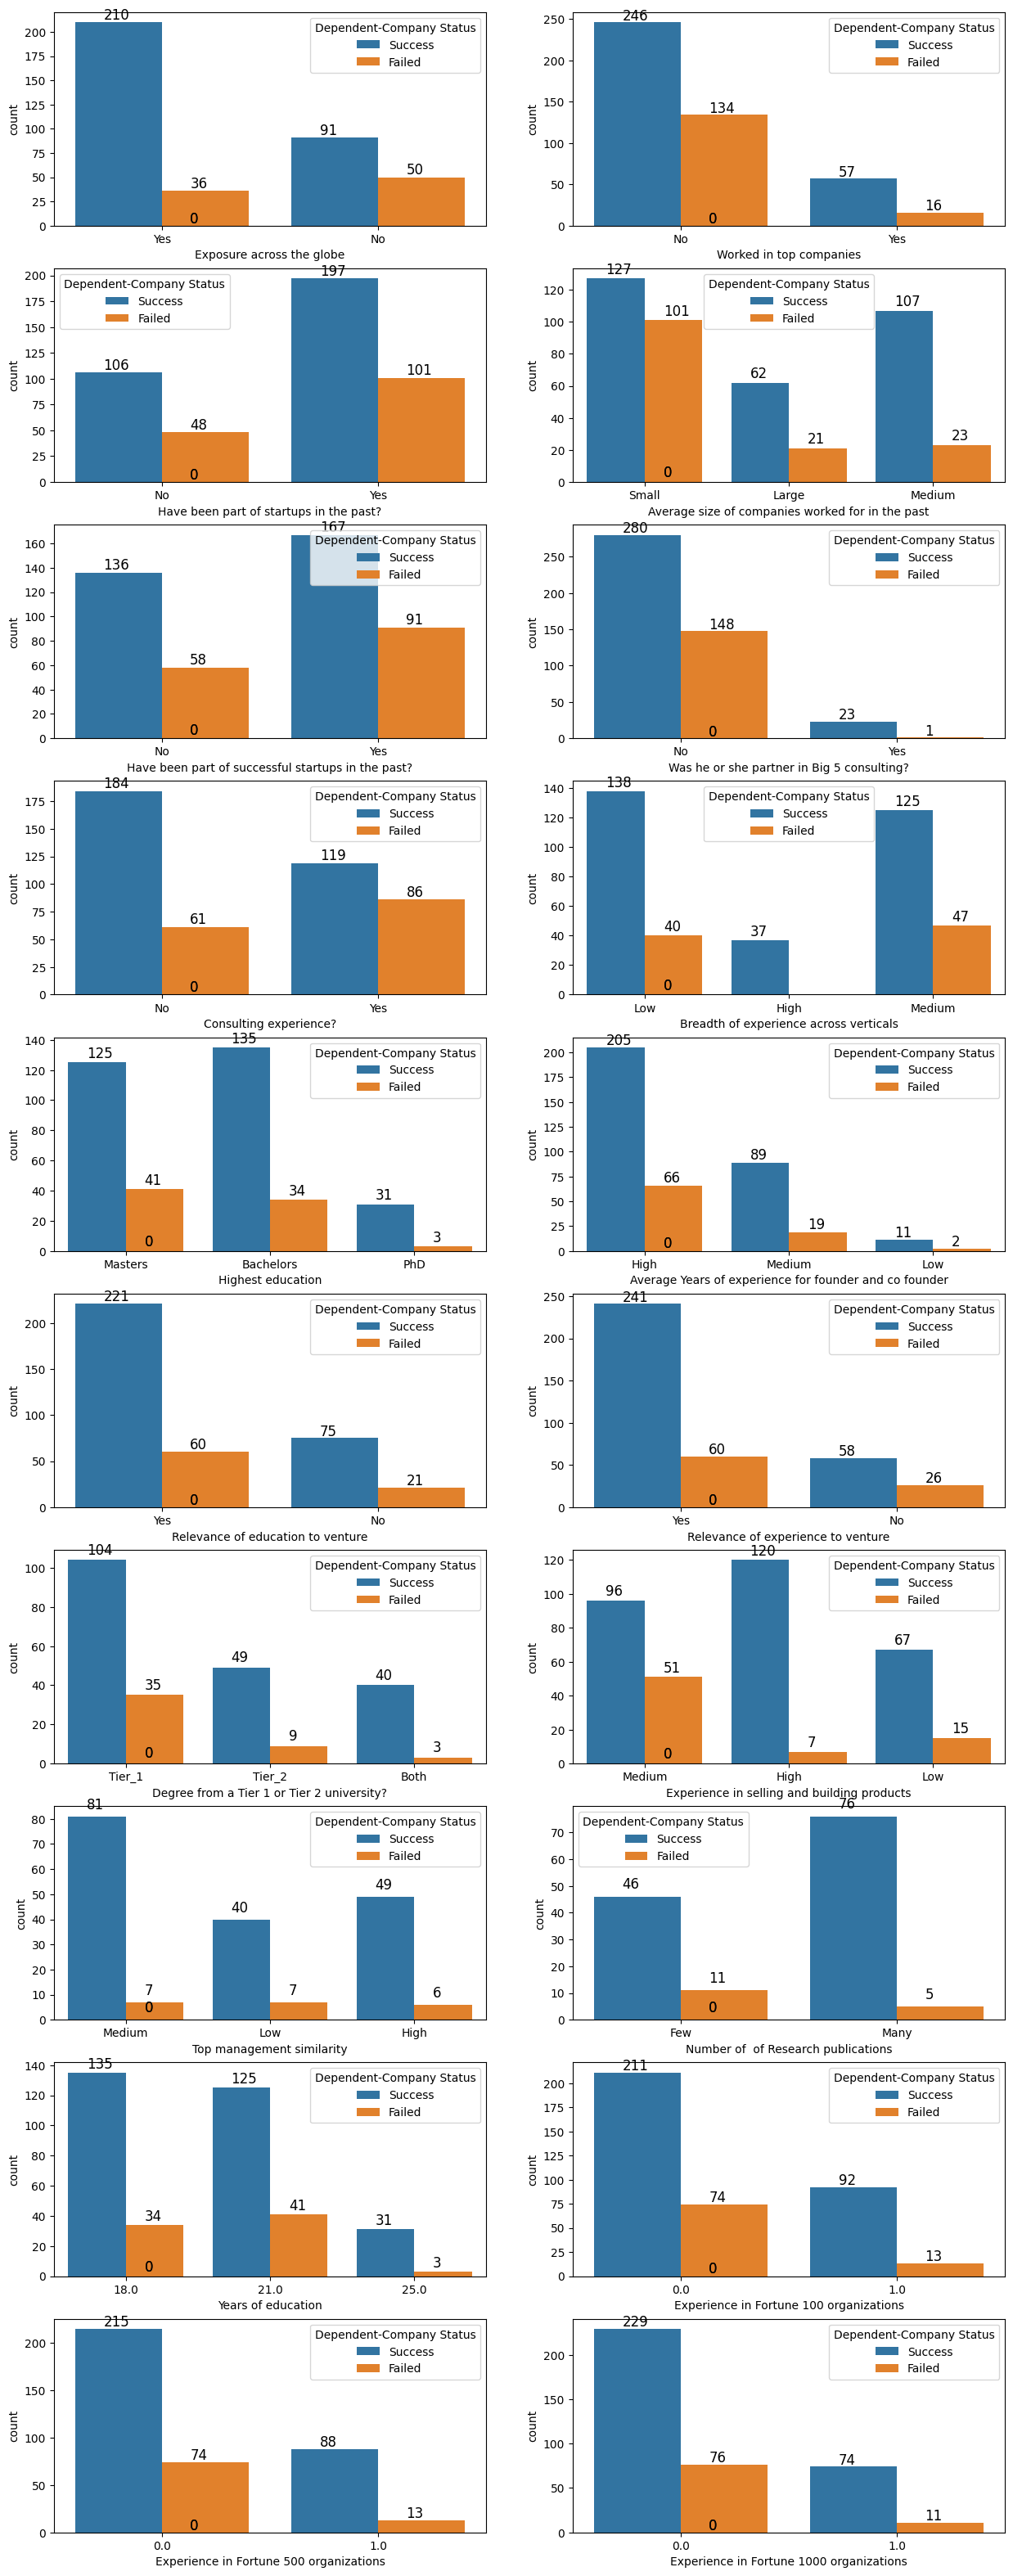

In [47]:
cat_columns=["Exposure across the globe","Worked in top companies",
"Have been part of startups in the past?","Average size of companies worked for in the past","Have been part of successful startups in the past?",
"Was he or she partner in Big 5 consulting?","Consulting experience?",
"Breadth of experience across verticals","Highest education",'Average Years of experience for founder and co founder',
"Relevance of education to venture","Relevance of experience to venture","Degree from a Tier 1 or Tier 2 university?",
"Experience in selling and building products","Top management similarity","Number of  of Research publications","Years of education",
"Experience in Fortune 100 organizations","Experience in Fortune 500 organizations","Experience in Fortune 1000 organizations"]

f=1
plt.figure(figsize=(15,40))
for j in cat_columns:
    plt.subplot(10,2,f)
    ax=sns.countplot(df,x=j,hue="Dependent-Company Status")

    plt.xlabel(j)
    for i in ax.patches:
        ax.text(i.get_x()+0.13,i.get_height()+3,int(i.get_height()), fontsize=12)
    f+=1
plt.show()

- If the founders had exposure across the globe, it increased the success rate of the startup by a lot.
- If the founder had relevance to venture, then the startup’s success rate increases a lot. Almost 83% of all successful startup founders had previous experience in venture capital.
- If the founders have already a prior experience in selling and building products, the chances of these startups succeeding increases a lot.



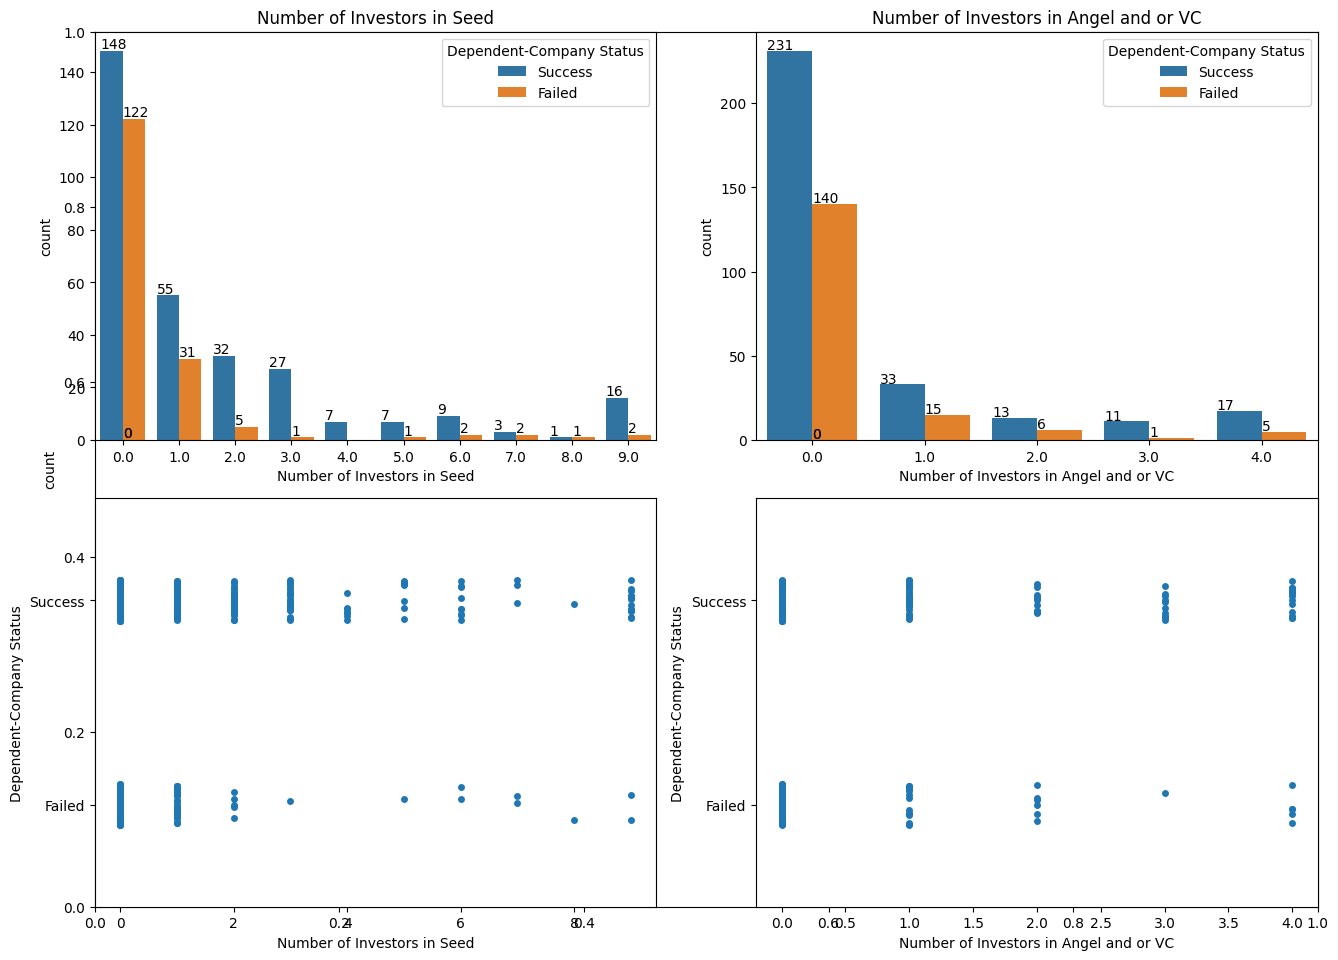

In [48]:
plt.figure(figsize=(14, 10))
plt.ylabel("count")

cols=['Number of Investors in Seed','Number of Investors in Angel and or VC']
k=1
for col in cols:
    q1 = df[col].quantile(0.05)
    q3 = df[col].quantile(0.96)
    df[col] = df[col].clip(q1,q3)
    df[col] = df[col].fillna(df[col].dropna().median())
    

    plt.subplot(2, 2, k) 
    k+=1
    ax = sns.countplot(data=df, x=col, hue="Dependent-Company Status")
    plt.title(col)
    for i in ax.patches:
        ax.text(i.get_x(), i.get_height()+1, f"{int(i.get_height())}", )
        
    plt.subplot(2, 2, k+1) 
    sns.stripplot(data=df, x=col, y="Dependent-Company Status" )
    
plt.tight_layout() 
plt.show()

<Figure size 1000x600 with 0 Axes>

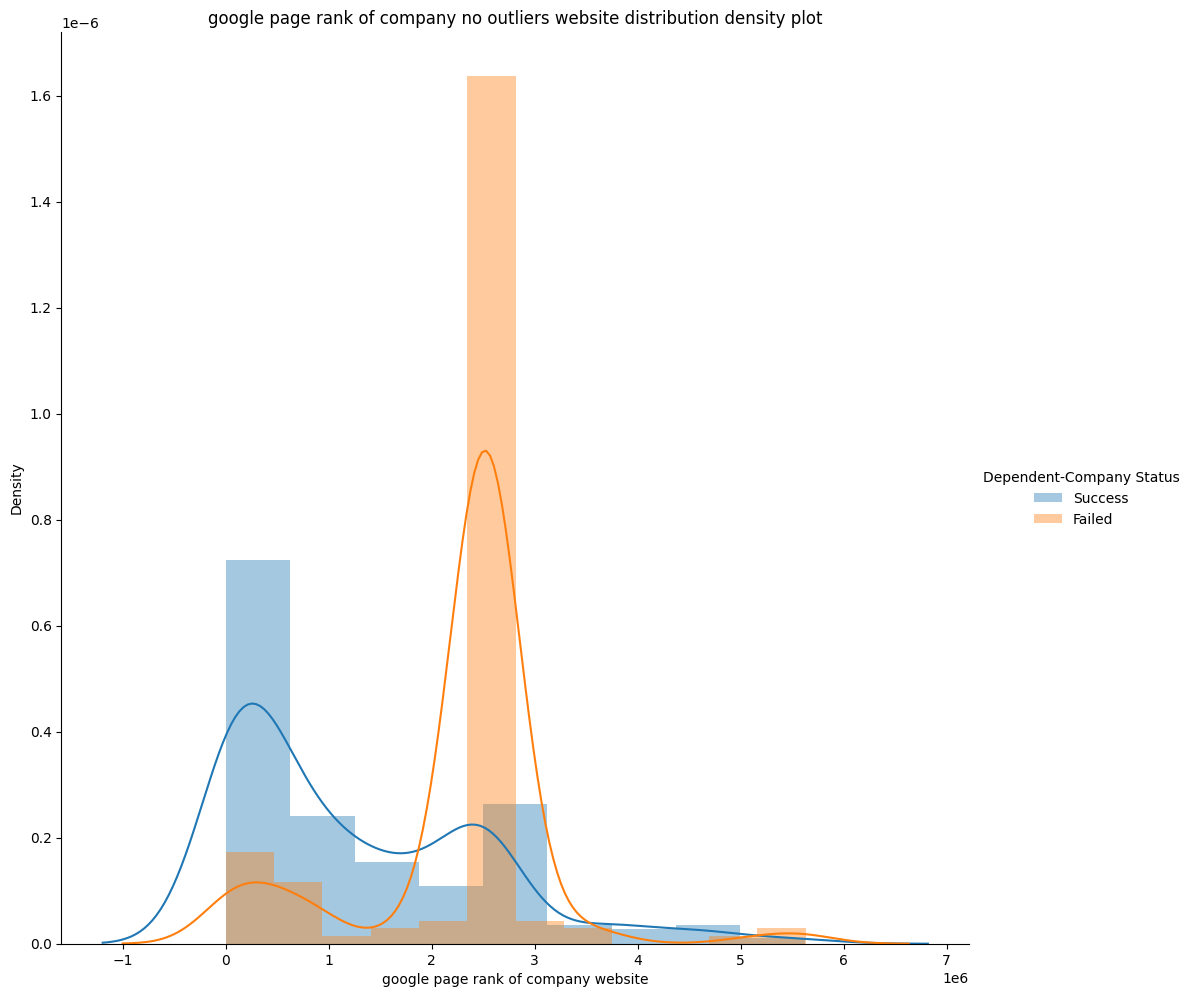

In [49]:
#removing outliers
googlePageRank = df['google page rank of company website'].fillna(df['google page rank of company website'].mean())
q1, q3 = googlePageRank.quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
outliers_lower = googlePageRank[googlePageRank < lower_bound]
outliers_upper = googlePageRank[googlePageRank > upper_bound]
googlePageRankNoOutliers = googlePageRank[~((googlePageRank < lower_bound) | (googlePageRank > upper_bound))]
googNoOutPD = pd.concat([googlePageRank, df['Dependent-Company Status']], axis=1)
googNoOutPD = googNoOutPD[~((googlePageRank < lower_bound) | (googlePageRank > upper_bound))]

plt.figure(figsize=(10,6))
sns.FacetGrid(googNoOutPD,hue='Dependent-Company Status',height=10)\
.map(sns.distplot,"google page rank of company website").add_legend()

plt.title("google page rank of company no outliers website distribution density plot")
plt.show()


Google Page Rank of Company Website vs Success Rate
Most successful startups have better page
rank (nearer to the top rank) than failed
startups.